In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [11]:
# 데이터 준비

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/3주/weather.csv").dropna()

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [12]:
# y 인코딩 (yes or no를 0, 1 형태로)

y = LabelEncoder().fit_transform(y)

# 전체 데이터 결측치 처리
df = df.fillna(df.mode().iloc[0])  # 범주형 포함 통합 결측치 처리

# 전체 데이터 원핫인코딩 (RainToday, WindDir 등 포함)
cat_cols = X.select_dtypes(include='object').columns

label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

In [13]:
# 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [14]:
# 모델 준비

# 1. 결정 트리
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# 2, 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3. 로지스틱 회귀
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# 모델 평가

from sklearn.metrics import accuracy_score

print("Decision Tree:", accuracy_score(y_test, dt_pred))
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Logistic Regression:", accuracy_score(y_test, lr_pred))

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred )
lr_acc = accuracy_score(y_test, lr_pred)

Decision Tree: 1.0
Random Forest: 1.0
Logistic Regression: 0.9545454545454546


# weather.csv 회귀 내용 추가


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# 데이터 준비

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/기계학습프로그래밍/3주/weather.csv").dropna()

# raintomorrow 삭제 후 rainfall 회귀로 예측
X = df.drop(columns=["Rainfall","RainTomorrow"])
y = df["Rainfall"]

In [21]:
# 전체 데이터 결측치 처리
df = df.fillna(df.mode().iloc[0])  # 범주형 포함 통합 결측치 처리

# 전체 데이터 원핫인코딩 (RainToday, WindDir 등 포함)
cat_cols = X.select_dtypes(include='object').columns

label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# 수치형 스케일링 (선형회귀 권장)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [22]:
# 선형회귀 모델 학습

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [23]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")

MSE: 0.068
R²: 0.546


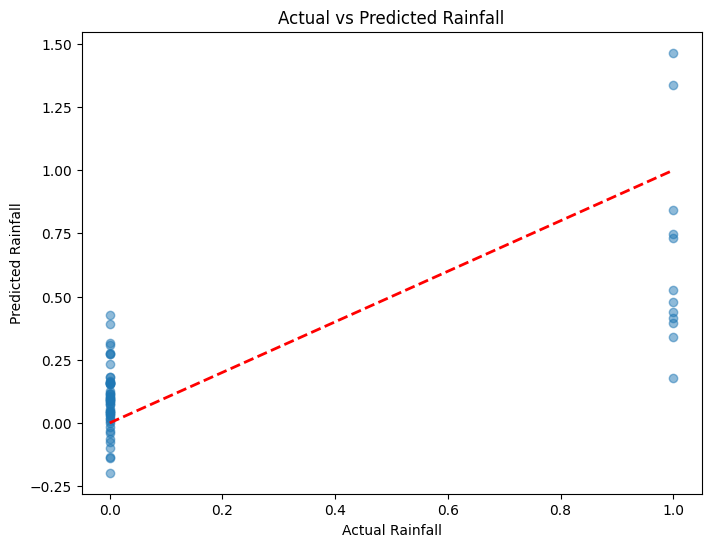

In [24]:
# 결과 시각화

import matplotlib.pyplot as plt

# 1. 예측값 vs 실제값 산점도
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # y=x 선
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()